# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import seaborn as sns
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Weekly.csv
/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Daily.csv
/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Monthly.csv


# Load Data

In [2]:
daily_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Daily.csv")
weekly_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Weekly.csv")
monthly_df = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Monthly.csv")

In [3]:
daily_df.head(10)

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-04-15,19.67,19.94,19.44,19.57,98025876,19.57
1,1,2013-04-16,19.68,19.92,19.62,19.85,69610320,19.85
2,2,2013-04-17,19.69,19.79,19.47,19.58,81398520,19.58
3,3,2013-04-18,19.65,19.66,19.05,19.17,132767100,19.17
4,4,2013-04-19,19.25,20.11,19.18,20.02,231895872,20.02
5,5,2013-04-22,20.04,20.12,19.39,20.02,115220664,20.02
6,6,2013-04-23,20.05,20.41,20.03,20.22,91600308,20.22
7,7,2013-04-24,20.22,20.47,20.22,20.36,73090836,20.36
8,8,2013-04-25,20.43,20.43,20.21,20.25,79608312,20.25
9,9,2013-04-26,20.21,20.21,19.93,20.06,99408492,20.06


In [4]:
weekly_df.head(10)

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-04-15,19.67,20.11,19.05,20.02,613697688,20.02
1,1,2013-04-22,20.04,20.47,19.39,20.06,458928612,20.06
2,2,2013-04-29,20.10,21.19,20.10,21.16,423312264,21.16
3,3,2013-05-06,21.23,22.04,21.23,22.03,426249324,22.03
4,4,2013-05-13,21.99,23.02,21.86,22.75,520091388,22.75
5,5,2013-05-20,22.65,23.04,21.80,21.85,455072472,21.85
6,6,2013-05-27,22.11,22.33,21.63,21.80,334105560,21.80
7,7,2013-06-03,21.85,22.02,21.20,22.02,467723808,22.02
8,8,2013-06-10,22.07,22.30,21.66,21.90,424179396,21.90
9,9,2013-06-17,22.00,22.79,21.85,22.05,582752664,22.05


In [5]:
monthly_df.head(10)

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80
1,1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03
2,2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22
3,3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19
4,4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92
5,5,2013-10-01,22.03,26.06,21.10,25.79,2206771020,25.79
6,6,2013-11-01,25.82,26.73,25.15,26.52,1049213736,26.52
7,7,2013-12-01,26.61,28.05,26.25,28.05,1352374272,28.05
8,8,2014-01-01,27.91,29.69,27.08,29.55,2178287532,29.55
9,9,2014-02-01,29.51,30.75,28.23,30.42,1620230148,30.42


# Data Cleaning & Visualization

In [6]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2510 non-null   int64  
 1   Date        2510 non-null   object 
 2   Price       2510 non-null   float64
 3   High        2510 non-null   float64
 4   Low         2510 non-null   float64
 5   Close       2510 non-null   float64
 6   Volume      2510 non-null   int64  
 7   Adj Close   2510 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 157.0+ KB


<AxesSubplot:>

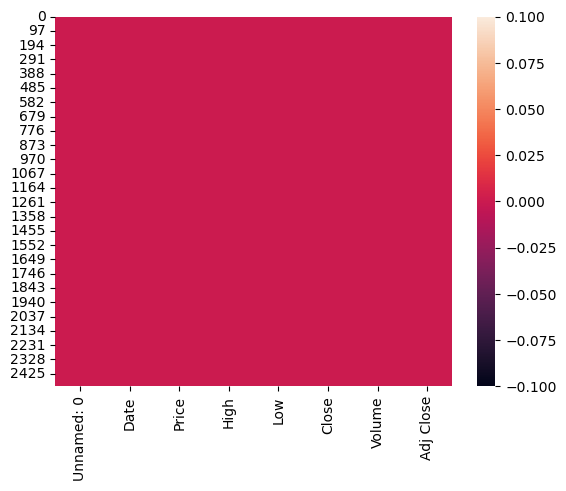

In [7]:
sns.heatmap(daily_df.isnull())

In [8]:
daily_df.drop(['Unnamed: 0'],axis=1,inplace=True)
weekly_df.drop(['Unnamed: 0'],axis=1,inplace=True)
monthly_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
daily_df.rename(columns={'Price':'Open'},inplace=True)
weekly_df.rename(columns={'Price':'Open'},inplace=True)
monthly_df.rename(columns={'Price':'Open'},inplace=True)

In [10]:
daily_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2013-04-15,19.67,19.94,19.44,19.57,98025876,19.57
1,2013-04-16,19.68,19.92,19.62,19.85,69610320,19.85
2,2013-04-17,19.69,19.79,19.47,19.58,81398520,19.58
3,2013-04-18,19.65,19.66,19.05,19.17,132767100,19.17
4,2013-04-19,19.25,20.11,19.18,20.02,231895872,20.02


In [11]:
daily_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [12]:
daily_df.shape

(2510, 7)

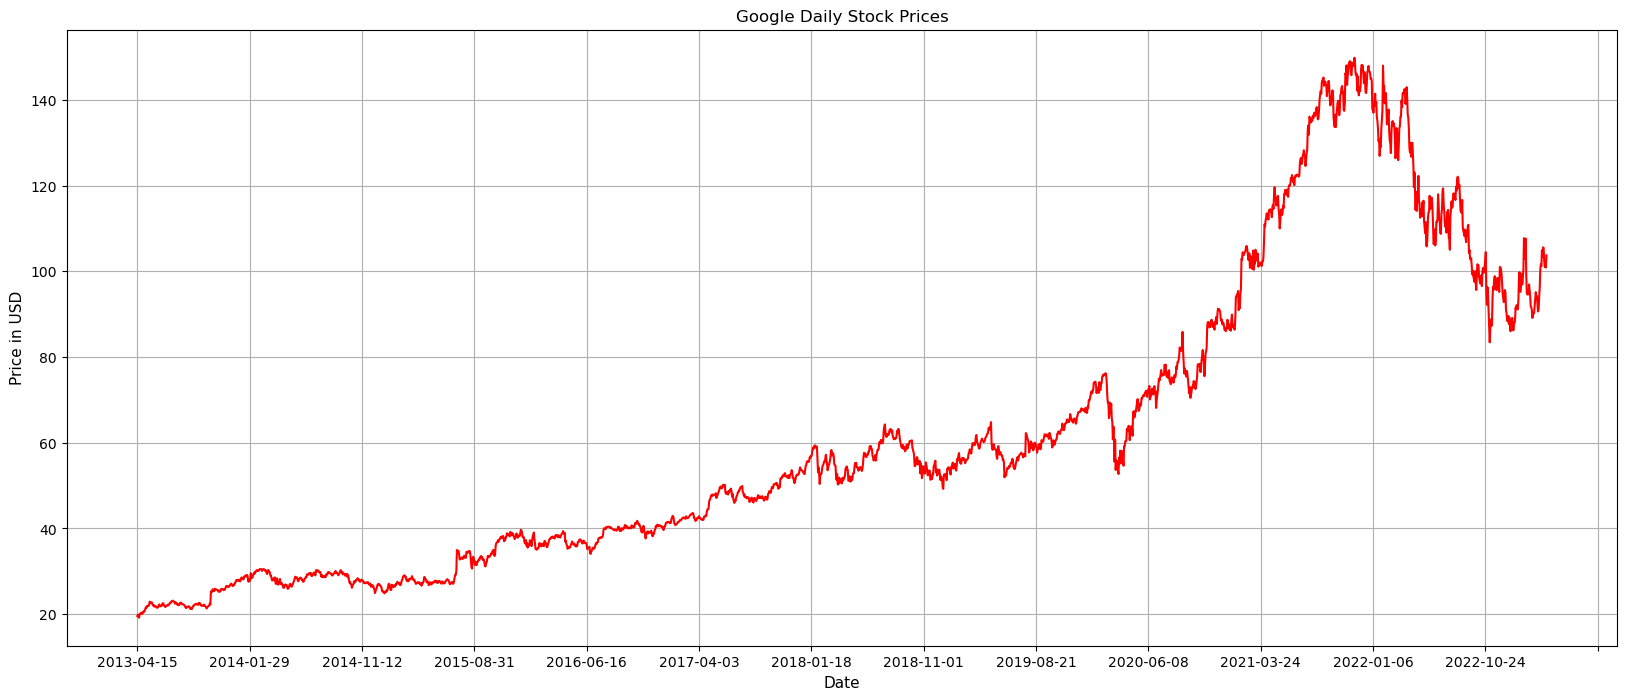

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(daily_df['Date'], daily_df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Google Daily Stock Prices')
plt.grid()
plt.show()

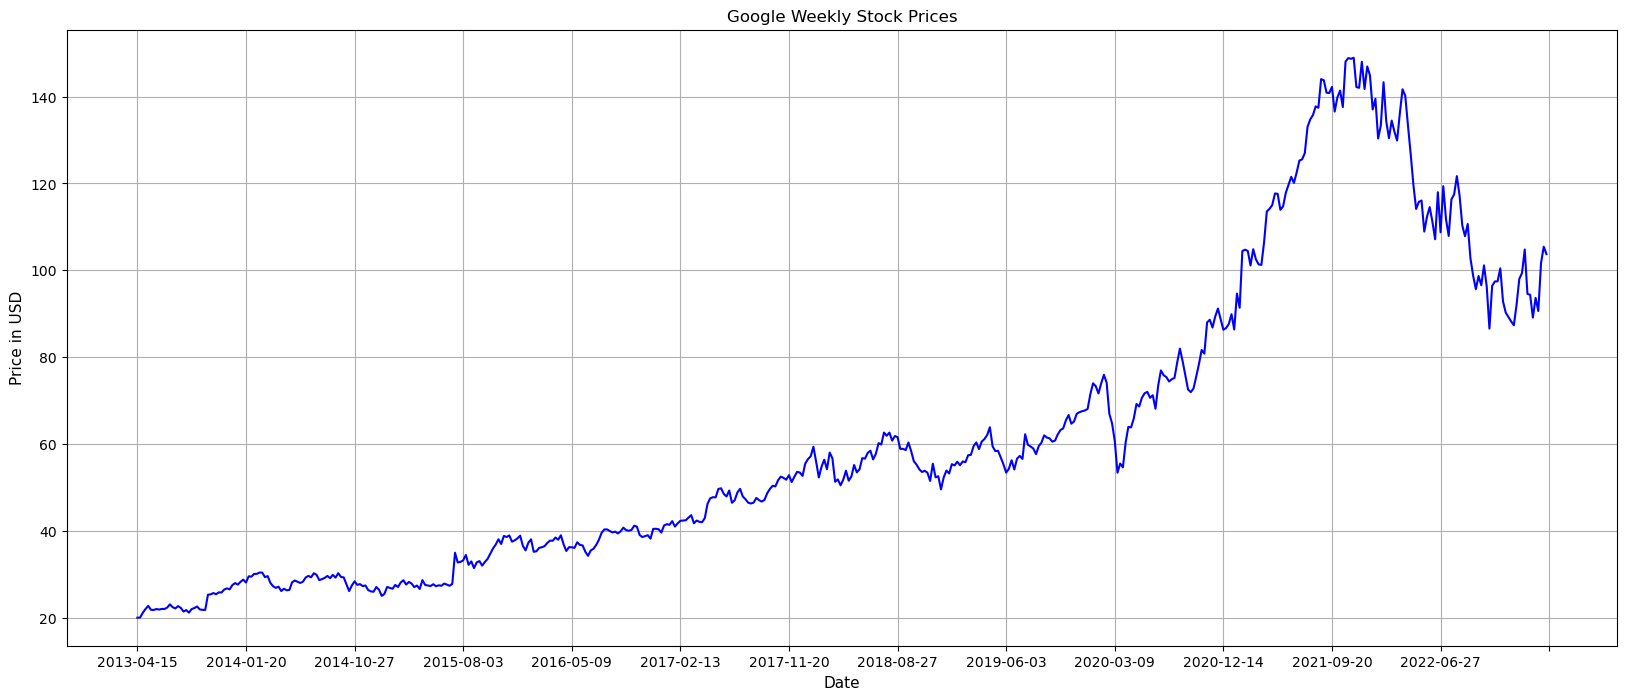

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(weekly_df['Date'], weekly_df['Close'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Google Weekly Stock Prices')
plt.grid()
plt.show()

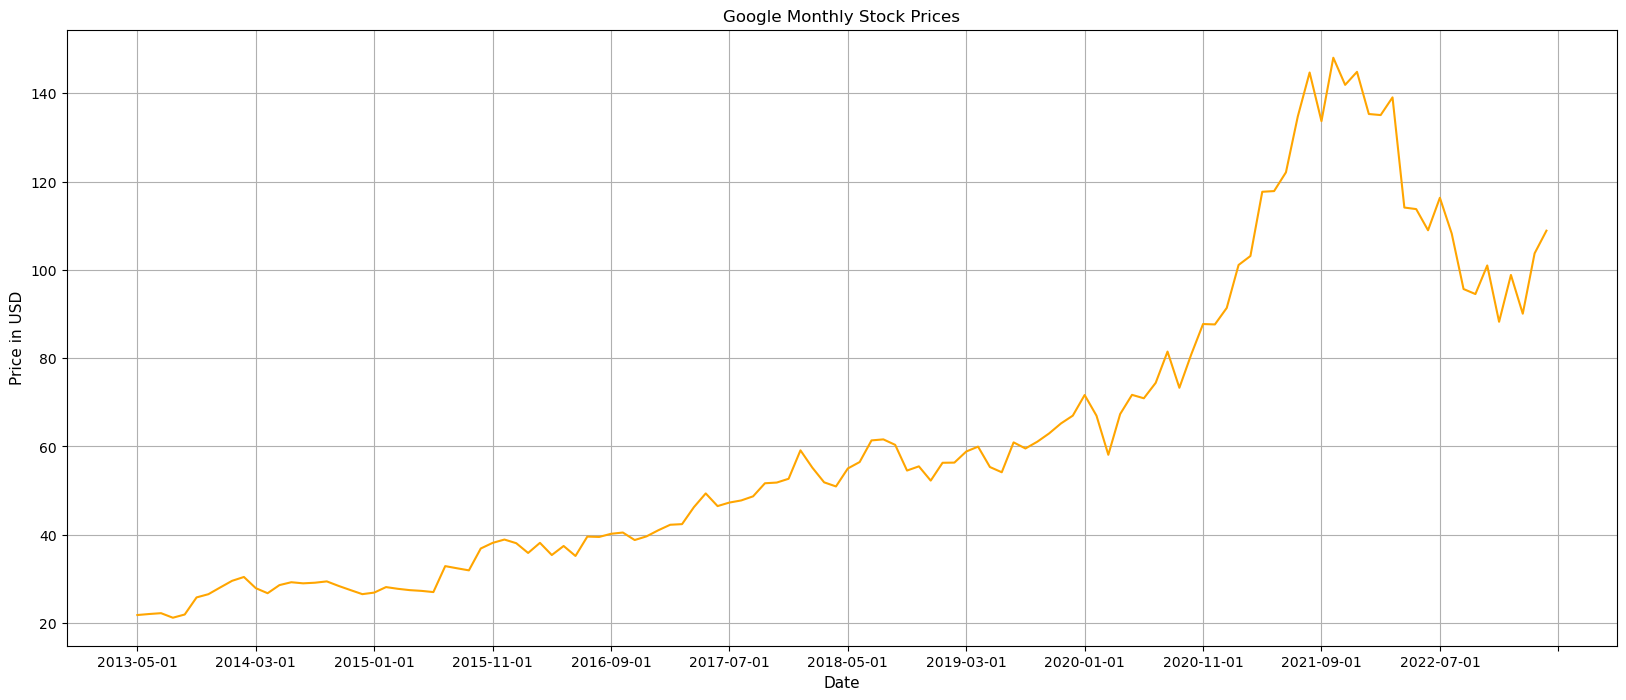

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(monthly_df['Date'], monthly_df['Close'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Google Monthly Stock Prices')
plt.grid()
plt.show()

In [16]:
def volume_analysis(df,cmp):
    plt.figure(figsize=(10,5))
    plt.plot(df['Date'],df['Volume'],c='blue')
    plt.title('Volume Of '+cmp+' Stock Traded')
    plt.ylabel('Volume')
    plt.show()

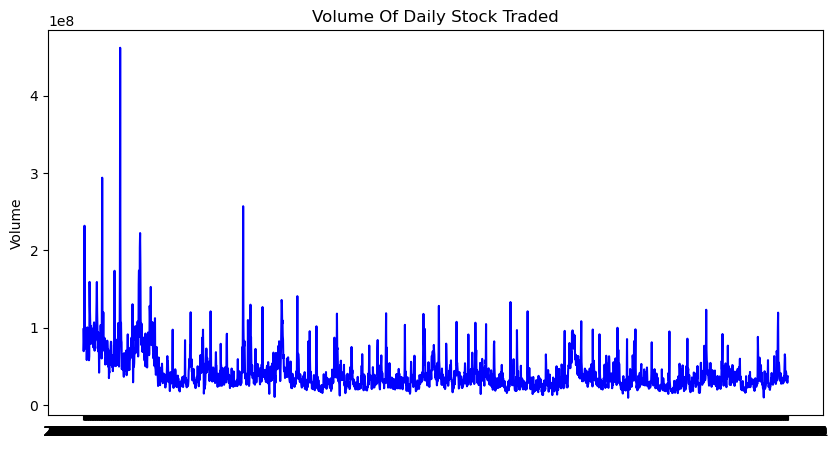

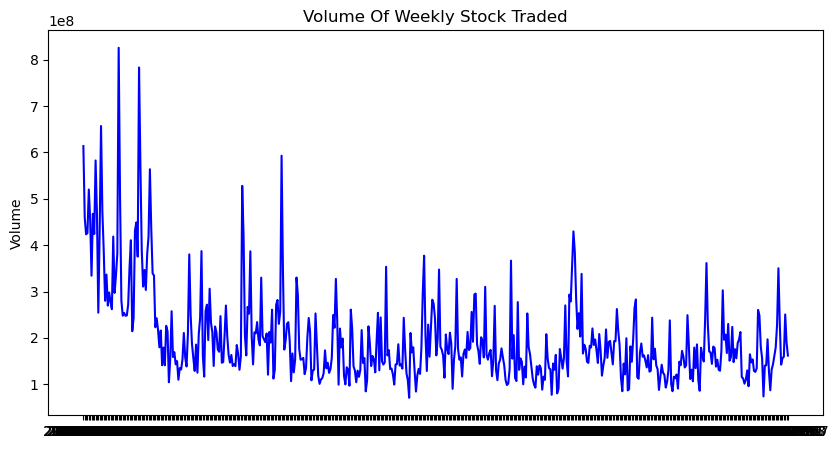

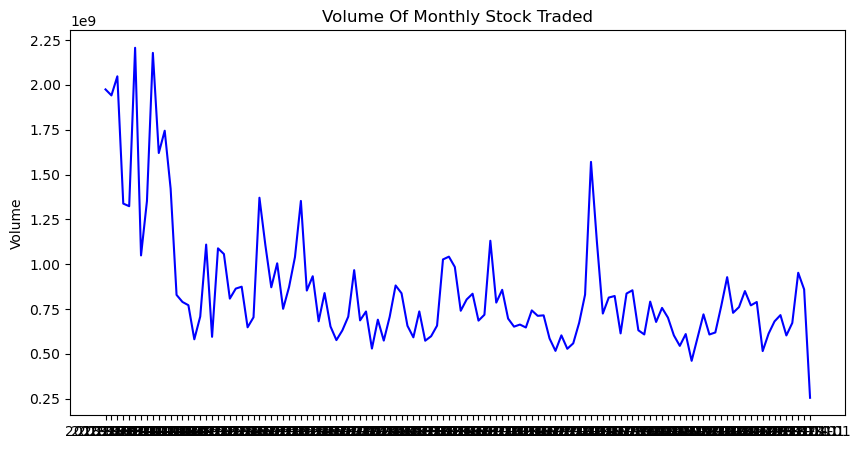

In [17]:
volume_analysis(daily_df,'Daily')
volume_analysis(weekly_df,'Weekly')
volume_analysis(monthly_df,'Monthly')

# Train & Test Splitting The Data

In [18]:
train, test = train_test_split(daily_df, test_size = 0.2)

In [19]:
test_pred = test.copy()

In [20]:
train.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
1833,2020-07-24,74.96,75.77,74.38,75.41,29902000,75.41
2230,2022-02-18,133.47,134.07,130.20,130.40,45620000,130.40
2067,2021-06-29,122.67,123.02,121.69,122.27,23108000,122.27
330,2014-08-05,28.97,29.01,28.52,28.66,32876000,28.66
2472,2023-02-07,103.22,108.18,103.12,107.64,49010200,107.64
1629,2019-10-02,59.83,59.94,58.63,58.90,33030000,58.90
2049,2021-06-03,117.29,117.85,116.48,117.38,18696000,117.38
2446,2022-12-29,86.62,88.85,86.61,88.45,23333500,88.45
293,2014-06-12,28.35,28.35,27.86,27.98,30930000,27.98
311,2014-07-09,28.95,29.20,28.85,29.17,27456000,29.17


In [21]:
test.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
1968,2021-02-05,102.98,104.80,102.50,104.44,29866000,104.44
559,2015-07-02,27.24,27.40,27.18,27.37,28124000,27.37
2478,2023-02-15,94.49,97.12,94.15,96.94,50169000,96.94
226,2014-03-07,30.70,30.71,30.32,30.40,60543396,30.40
1472,2019-02-19,55.83,56.48,55.83,56.33,21980000,56.33
645,2015-11-03,37.27,37.58,37.06,37.44,36306000,37.44
2418,2022-11-17,96.97,99.28,96.79,98.36,26052600,98.36
1387,2018-10-15,55.90,56.09,54.91,55.12,30074000,55.12
1407,2018-11-12,53.66,53.71,52.02,52.47,34002000,52.47
1349,2018-08-21,61.15,61.64,60.75,60.87,23082000,60.87


In [22]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [23]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [24]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = model_lnr.predict(x_test)

In [26]:
result = model_lnr.predict([[19.67,19.94,19.44,98025876]])
print(result)

[19.70835809]


In [27]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 0.241
RMSE 0.491
MAE 0.292
MAPE 0.004
R2 Score :  1.0
